# Simple Linear Regression

# Dataset

Population of U.S. Cities

# Description

The bigcity data frame has 49 rows and 2 columns.
The measurements are the population (in 1000's) of 49 U.S. cities in 1920 and 1930. The 49 cities are a random sample taken
from the 196 largest cities in 1920.

# Format

This data frame contains the following columns:

u The 1920 population.

x The 1930 population.

Source:

The data were obtained from

Cochran, W.G. (1977) Sampling Techniques. Third edition. John Wiley

References:

Davison, A.C. and Hinkley, D.V. (1997) Bootstrap Methods and Their Application. Cambridge University Press

# Exploring and Understanding Data (EDA)

# 1. Load required Libraries

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
sc  = StandardScaler()

from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()

from sklearn.model_selection import train_test_split

from statsmodels.formula.api import ols

import statsmodels.api as sm

from statsmodels.graphics.gofplots import qqplot

from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error,confusion_matrix,accuracy_score,roc_auc_score

from sklearn.linear_model import LinearRegression
lr = LinearRegression()

# 2. Collect and load data

In [2]:
df = pd.read_csv('bigcity.csv')
df.head()

,Unnamed: 0,u,x
0,1,138,143
1,2,93,104
2,3,61,69
3,4,179,260
4,5,48,75


The description of the problem tells us that there are only 2 columns, here we see that the first column is having the index numbers so dropping that column

In [3]:
df.drop('Unnamed: 0',axis=1,inplace=True)
df.head()

,u,x
0,138,143
1,93,104
2,61,69
3,179,260
4,48,75


# 3. Explore numeric variables - five number summary

In [4]:
df.describe()

,u,x
count,49.000000,49.000000
mean,103.142857,127.795918
std,104.405061,123.121211
min,2.000000,46.000000
25%,43.000000,58.000000
50%,64.000000,79.000000
75%,120.000000,130.000000
max,507.000000,634.000000


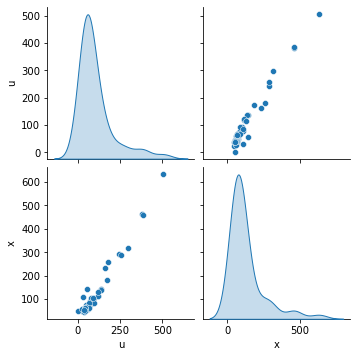

In [5]:
sns.pairplot(df,diag_kind='kde')

Data needs to be scalled so that all line in the same plane.

In [6]:
df_scaled = sc.fit_transform(df)
df = pd.DataFrame(df_scaled,columns=df.columns)
df.head()

,u,x
0,0.337324,0.124768
1,-0.098156,-0.195275
2,-0.407831,-0.482494
3,0.734095,1.084899
4,-0.533636,-0.433256


# 3a. Visualize numeric variables in boxplot and histograms
# 3b. Measure spread – variance and standard deviation

C:\Users\fayiq\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


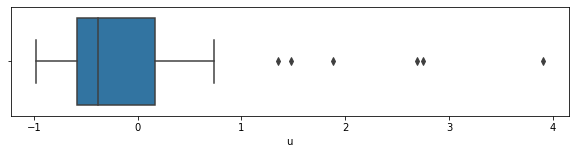

C:\Users\fayiq\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


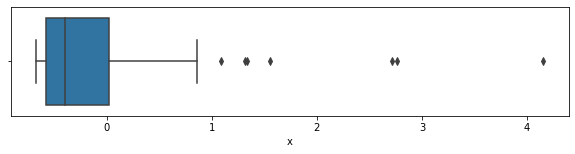

In [7]:
for col in df.columns:
    plt.figure(figsize=(10,2))
    sns.boxplot(df[col])
    plt.show()

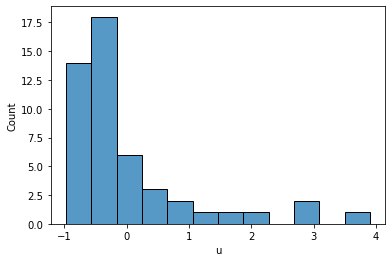

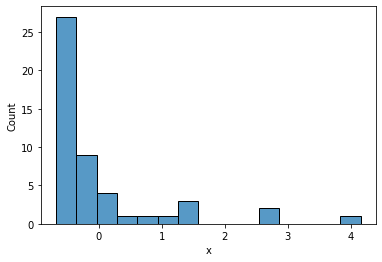

In [8]:
for col in df.columns:
    sns.histplot(df[col])
    plt.show()

Data needs to be normalized, so using power transformer to do the same.

In [9]:
pt.fit(df)

PowerTransformer()

In [10]:
pt.transform(df)

array([[ 0.98765593,  0.92893548],
       [ 0.44413399,  0.36191517],
       [-0.23227359, -0.51683099],
       [ 1.27006333,  1.55365771],
       [-0.59372665, -0.33666247],
       [-0.94245238, -0.71037896],
       [-1.22196591, -1.17809105],
       [-1.44642395, -1.25617253],
       [-1.18580335,  0.49189289],
       [-2.33684183, -1.17809105],
       [-0.90906853, -1.10167848],
       [-0.65414022, -1.064092  ],
       [ 0.01038312, -0.22372987],
       [-1.37016967, -0.91782176],
       [ 1.69016673,  1.67882007],
       [ 0.07744059,  0.12867936],
       [-0.53461661, -0.8822611 ],
       [ 0.12071293, -0.1963725 ],
       [ 1.84336687,  1.85002764],
       [ 1.85221423,  1.84615376],
       [ 0.16285387,  0.40046568],
       [-0.25819788, -0.91782176],
       [ 1.99026526,  1.94276732],
       [-0.53461661, -0.67717   ],
       [ 0.14192404,  0.03457426],
       [-0.15633172, -0.27949082],
       [-0.84332159, -0.8123312 ],
       [ 0.97017037,  0.88626156],
       [ 1.54040769,

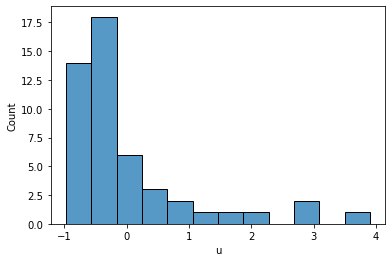

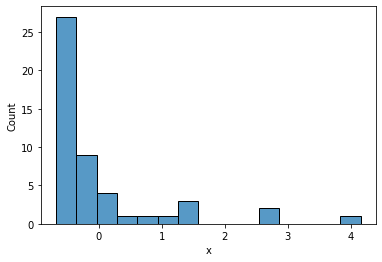

In [11]:
for col in df.columns:
    sns.histplot(df[col])
    plt.show()

# 4. Explore relationships between variables using scatterplots and two-way cross tabulations

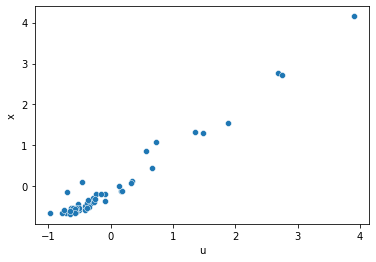

In [12]:
sns.scatterplot(data=df,x='u',y='x')
plt.show()

# 5. Transform the dataset
Find the number of rows in given dataset and separate the input and target variables into X and Y. Hint: You can shape function 
to get the size of the dataframe

In [13]:
print('Shape of the original dataframe: ',df.shape)
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
print('Shape of the target variable: ',y.shape)
print('Shape of the feature variable: ',X.shape)

Shape of the original dataframe:  (49, 2)
Shape of the target variable:  (49,)
Shape of the feature variable:  (49, 1)


# 6. Check the dataset for any missing values and also print out the correlation matrix
You can use .isna() and .corr() functions to check NA's and correlation in the dataframe respectively

In [14]:
(df.isnull().sum()/len(df))*100

u    0.0
x    0.0
dtype: float64

no missing values in the dataset

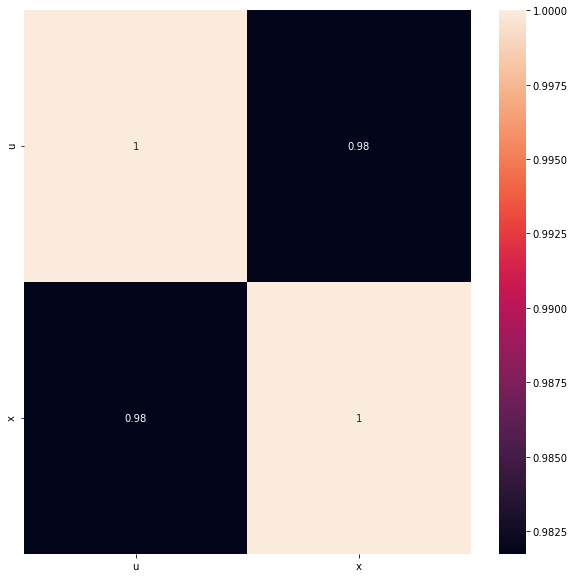

In [15]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

The high correlation betwwen u and x indicates that the variable u is a good predictor of variable x

# 7. Split data into train, test sets
Divide the data into training and test sets with 80-20 split using scikit-learn. Print the shapes of training and test feature 
sets.*
Check: train_test_split function

In [16]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(34, 1)
(15, 1)
(34,)
(15,)


# 8. Find coefficients & intercept
Estimate the coefficients b0 and b1 using scikit-learn.
Check: coef_ and intercept_ functions can help you get coefficients & intercept

In [17]:
regressor = LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [18]:
y_pred = regressor.predict(x_test)

In [19]:
print('Coefficients : ',regressor.coef_)
print('Intercepts: ',regressor.intercept_)

Coefficients :  [0.98499041]
Intercepts:  -0.021803513586840177


# 9.  Linear Relationship between feature and target
Plot the line with b1 and b0 as slope and y-intercept.

In [20]:
model = sm.OLS(y_train,x_train).fit()

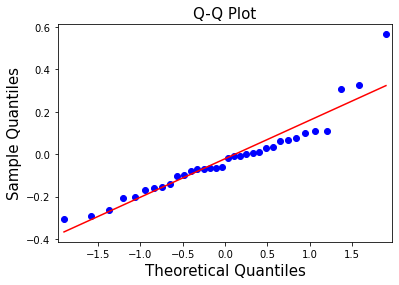

In [21]:
qqplot(model.resid, line = 'r')
plt.title('Q-Q Plot', fontsize = 15)
plt.xlabel('Theoretical Quantiles', fontsize = 15)
plt.ylabel('Sample Quantiles', fontsize = 15)
plt.show()

# 10. Evaluation of model with scikit-learn
Validate the model with Root Mean Squares error and R^2 score using scikit-learn. RMSE and R2 for test data and prediction

Hint: You can import mean_squared_error function & r2 (R square) from sklearn.metrics. Performing root operation over mean 
square error over mean square error gives you root mean square error

In [22]:
print('RMSE : ',np.sqrt(mean_squared_error(y_test,y_pred)))
print('R^2 score',r2_score(y_test,y_pred))

RMSE :  0.2256703025268609
R^2 score 0.933200469756719


# 11. Calculate the accuracy of the model for both training and test data set

Hint: .score() function

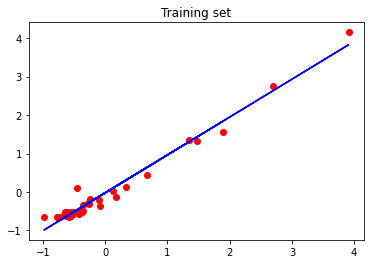

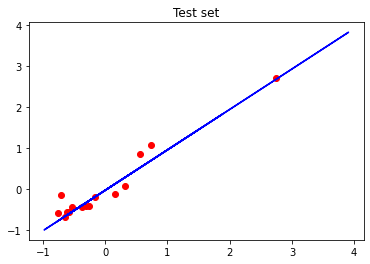

In [23]:
# Visualising the Training set results
plt.scatter(x_train, y_train, color = 'red')
plt.plot(x_train, regressor.predict(x_train), color = 'blue')
plt.title('Training set')
plt.show()

# Visualising the Test set results
plt.scatter(x_test, y_test, color = 'red')
plt.plot(x_train, regressor.predict(x_train), color = 'blue')
plt.title('Test set')
plt.show()

In [24]:
print('Score for the Training set',regressor.score(x_train,y_train))
print('Score for the Test set',regressor.score(x_test,y_test))

Score for the Training set 0.9724969255878055
Score for the Test set 0.933200469756719
